In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/


 CNN		    custom_yolo_project		     IIS_Project     Tree_Classification.gslides
'Colab Notebooks'   dataset			    'oshi cv.docx'   yolo_data
 custom		    ICT3214_IndividualProject.docx   Pics	     yolov8


In [ ]:
%cd /content/drive/MyDrive/custom_yolo_project


/content/drive/MyDrive/custom_yolo_project


In [ ]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 17067, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 17067 (delta 24), reused 27 (delta 12), pack-reused 17022 (from 1)
Receiving objects: 100% (17067/17067), 15.69 MiB | 13.07 MiB/s, done.
Resolving deltas: 100% (11718/11718), done.
Updating files: 100% (146/146), done.


In [ ]:
%cd /content/drive/MyDrive/custom_yolo_project/yolov5

/content/drive/MyDrive/custom_yolo_project/yolov5


In [ ]:
import yaml


with open('models/yolov5s.yaml', 'r') as file:
    config = yaml.safe_load(file)


print(config)


{'nc': 80, 'depth_multiple': 0.33, 'width_multiple': 0.5, 'anchors': [[10, 13, 16, 30, 33, 23], [30, 61, 62, 45, 59, 119], [116, 90, 156, 198, 373, 326]], 'backbone': [[-1, 1, 'Conv', [64, 6, 2, 2]], [-1, 1, 'Conv', [128, 3, 2]], [-1, 3, 'C3', [128]], [-1, 1, 'Conv', [256, 3, 2]], [-1, 6, 'C3', [256]], [-1, 1, 'Conv', [512, 3, 2]], [-1, 9, 'C3', [512]], [-1, 1, 'Conv', [1024, 3, 2]], [-1, 3, 'C3', [1024]], [-1, 1, 'SPPF', [1024, 5]]], 'head': [[-1, 1, 'Conv', [512, 1, 1]], [-1, 1, 'nn.Upsample', ['None', 2, 'nearest']], [[-1, 6], 1, 'Concat', [1]], [-1, 3, 'C3', [512, False]], [-1, 1, 'Conv', [256, 1, 1]], [-1, 1, 'nn.Upsample', ['None', 2, 'nearest']], [[-1, 4], 1, 'Concat', [1]], [-1, 3, 'C3', [256, False]], [-1, 1, 'Conv', [256, 3, 2]], [[-1, 14], 1, 'Concat', [1]], [-1, 3, 'C3', [512, False]], [-1, 1, 'Conv', [512, 3, 2]], [[-1, 10], 1, 'Concat', [1]], [-1, 3, 'C3', [1024, False]], [[17, 20, 23], 1, 'Detect', ['nc', 'anchors']]]}


In [ ]:
!python train.py --data /content/drive/MyDrive/custom_yolo_project/dataset.yaml --cfg models/yolov5s.yaml --weights yolov5s.pt --epochs 5

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-12-05 08:36:33.965998: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-05 08:36:33.989489: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-05 08:36:33.996633: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visua

In [ ]:

new_layer = [-1, 1, 'Conv', [512, 3, 1]]
config['head'].insert(-1, new_layer)

config['nc'] = 3


In [ ]:

with open('/content/drive/MyDrive/custom_yolo_project/yolov5/models/yolov5s.yaml', 'w') as file:
    yaml.dump(config, file, default_flow_style=False)


with open('/content/drive/MyDrive/custom_yolo_project/yolov5/models/yolov5s.yaml', 'r') as file:
    print(file.read())


anchors:
- - 10
  - 13
  - 16
  - 30
  - 33
  - 23
- - 30
  - 61
  - 62
  - 45
  - 59
  - 119
- - 116
  - 90
  - 156
  - 198
  - 373
  - 326
backbone:
- - -1
  - 1
  - Conv
  - - 64
    - 6
    - 2
    - 2
- - -1
  - 1
  - Conv
  - - 128
    - 3
    - 2
- - -1
  - 3
  - C3
  - - 128
- - -1
  - 1
  - Conv
  - - 256
    - 3
    - 2
- - -1
  - 6
  - C3
  - - 256
- - -1
  - 1
  - Conv
  - - 512
    - 3
    - 2
- - -1
  - 9
  - C3
  - - 512
- - -1
  - 1
  - Conv
  - - 1024
    - 3
    - 2
- - -1
  - 3
  - C3
  - - 1024
- - -1
  - 1
  - SPPF
  - - 1024
    - 5
depth_multiple: 0.33
head:
- - -1
  - 1
  - Conv
  - - 512
    - 1
    - 1
- - -1
  - 1
  - nn.Upsample
  - - None
    - 2
    - nearest
- - - -1
    - 6
  - 1
  - Concat
  - - 1
- - -1
  - 3
  - C3
  - - 512
    - false
- - -1
  - 1
  - Conv
  - - 256
    - 1
    - 1
- - -1
  - 1
  - nn.Upsample
  - - None
    - 2
    - nearest
- - - -1
    - 4
  - 1
  - Concat
  - - 1
- - -1
  - 3
  - C3
  - - 256
    - false
- - -1
  - 1
  - Conv
  

In [ ]:
!python /content/drive/MyDrive/custom_yolo_project/yolov5/train.py --data /content/drive/MyDrive/custom_yolo_project/dataset.yaml --cfg /content/drive/MyDrive/custom_yolo_project/yolov5/models/yolov5s.yaml --weights yolov5s.pt --epochs 5


wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-12-05 11:53:20.186703: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-05 11:53:20.210740: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-05 11:53:20.218309: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visua

In [ ]:
import yaml


with open('/content/drive/MyDrive/custom_yolo_project/yolov5/models/yolov5s.yaml', 'r') as file:
    config = yaml.safe_load(file)


new_layers = [
    [-1, 1, 'Conv', [256, 3, 1]],
]

neck_index = len(config['head']) - 1
config['head'] = config['head'][:-1] + new_layers + [config['head'][-1]]


with open('/content/drive/MyDrive/custom_yolo_project/yolov5/models/yolov5s.yaml', 'w') as file:
    yaml.dump(config, file, default_flow_style=False)


with open('/content/drive/MyDrive/custom_yolo_project/yolov5/models/yolov5s.yaml', 'r') as file:
    print(file.read())



anchors:
- - 10
  - 13
  - 16
  - 30
  - 33
  - 23
- - 30
  - 61
  - 62
  - 45
  - 59
  - 119
- - 116
  - 90
  - 156
  - 198
  - 373
  - 326
backbone:
- - -1
  - 1
  - Conv
  - - 64
    - 6
    - 2
    - 2
- - -1
  - 1
  - Conv
  - - 128
    - 3
    - 2
- - -1
  - 3
  - C3
  - - 128
- - -1
  - 1
  - Conv
  - - 256
    - 3
    - 2
- - -1
  - 6
  - C3
  - - 256
- - -1
  - 1
  - Conv
  - - 512
    - 3
    - 2
- - -1
  - 9
  - C3
  - - 512
- - -1
  - 1
  - Conv
  - - 1024
    - 3
    - 2
- - -1
  - 3
  - C3
  - - 1024
- - -1
  - 1
  - SPPF
  - - 1024
    - 5
depth_multiple: 0.33
head:
- - -1
  - 1
  - Conv
  - - 512
    - 1
    - 1
- - -1
  - 1
  - nn.Upsample
  - - None
    - 2
    - nearest
- - - -1
    - 6
  - 1
  - Concat
  - - 1
- - -1
  - 3
  - C3
  - - 512
    - false
- - -1
  - 1
  - Conv
  - - 256
    - 1
    - 1
- - -1
  - 1
  - nn.Upsample
  - - None
    - 2
    - nearest
- - - -1
    - 4
  - 1
  - Concat
  - - 1
- - -1
  - 3
  - C3
  - - 256
    - false
- - -1
  - 1
  - Conv
  

In [ ]:
!python /content/drive/MyDrive/custom_yolo_project/yolov5/train.py --data /content/drive/MyDrive/custom_yolo_project/dataset.yaml --cfg /content/drive/MyDrive/custom_yolo_project/yolov5/models/yolov5s.yaml --weights yolov5s.pt --epochs 5

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-12-05 12:46:49.975320: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-05 12:46:50.036191: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-05 12:46:50.056338: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visua

In [ ]:

new_head_layers = [
    [-1, 1, 'Conv', [512, 3, 1]],
    [-1, 1, 'Conv', [256, 3, 1]],
    [-1, 1, 'SPPF', [256]],
    [-1, 1, 'Conv', [128, 1, 1]]
]


config['head'] = config['head'][:-1] + new_head_layers + [config['head'][-1]]


with open('/content/drive/MyDrive/custom/yolov5/models/yolov5s.yaml', 'w') as file:
    yaml.dump(config, file, default_flow_style=False)


with open('/content/drive/MyDrive/custom/yolov5/models/yolov5s.yaml', 'r') as file:
    print(file.read())


anchors:
- - 10
  - 13
  - 16
  - 30
  - 33
  - 23
- - 30
  - 61
  - 62
  - 45
  - 59
  - 119
- - 116
  - 90
  - 156
  - 198
  - 373
  - 326
backbone:
- - -1
  - 1
  - Conv
  - - 64
    - 6
    - 2
    - 2
- - -1
  - 1
  - Conv
  - - 128
    - 3
    - 2
- - -1
  - 3
  - C3
  - - 128
- - -1
  - 1
  - Conv
  - - 256
    - 3
    - 2
- - -1
  - 6
  - C3
  - - 256
- - -1
  - 1
  - Conv
  - - 512
    - 3
    - 2
- - -1
  - 9
  - C3
  - - 512
- - -1
  - 1
  - Conv
  - - 1024
    - 3
    - 2
- - -1
  - 3
  - C3
  - - 1024
- - -1
  - 1
  - SPPF
  - - 1024
    - 5
depth_multiple: 0.33
head:
- - -1
  - 1
  - Conv
  - - 512
    - 1
    - 1
- - -1
  - 1
  - nn.Upsample
  - - None
    - 2
    - nearest
- - - -1
    - 6
  - 1
  - Concat
  - - 1
- - -1
  - 3
  - C3
  - - 512
    - false
- - -1
  - 1
  - Conv
  - - 256
    - 1
    - 1
- - -1
  - 1
  - nn.Upsample
  - - None
    - 2
    - nearest
- - - -1
    - 4
  - 1
  - Concat
  - - 1
- - -1
  - 3
  - C3
  - - 256
    - false
- - -1
  - 1
  - Conv
  

In [ ]:
!python /content/drive/MyDrive/custom/yolov5/train.py --data /content/drive/MyDrive/custom_yolo_project/dataset.yaml --cfg models/yolov5s.yaml --weights yolov5s.pt --epochs 5

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-12-05 07:40:20.171481: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-05 07:40:20.195979: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-05 07:40:20.202884: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visua

In [ ]:
import yaml

yaml_file_path = '/content/drive/MyDrive/custom_yolo_project/yolov5/data/hyps/hyp.Objects365.yaml'

with open(yaml_file_path, 'r') as file:
    hyp_data = yaml.safe_load(file)


hyp_data['lr0'] = 0.01

with open(yaml_file_path, 'w') as file:
    yaml.dump(hyp_data, file, default_flow_style=False)

print(f"Updated {yaml_file_path} with new hyperparameters.")


Updated /content/drive/MyDrive/custom_yolo_project/yolov5/data/hyps/hyp.Objects365.yaml with new hyperparameters.


In [ ]:
!python /content/drive/MyDrive/custom_yolo_project/yolov5/train.py --data /content/drive/MyDrive/custom_yolo_project/dataset.yaml --cfg /content/drive/MyDrive/custom_yolo_project/yolov5/models/yolov5s.yaml --weights yolov5s.pt --epochs 10 --batch-size 16 --img-size 640

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.4/898.4 kB 28.9 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-12-06 06:17:22.410402: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-06 06:17:22.435659: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-06 06:17:22.442882

In [ ]:
!python /content/drive/MyDrive/custom_yolo_project/yolov5/train.py --data /content/drive/MyDrive/custom_yolo_project/dataset.yaml --cfg /content/drive/MyDrive/custom_yolo_project/yolov5/models/yolov5s.yaml --weights yolov5s.pt --epochs 15 --batch-size 16 --img-size 640

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-12-06 10:41:21.411834: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-06 10:41:21.463055: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-06 10:41:21.480188: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visua

In [ ]:
import yaml

yaml_file_path = '/content/drive/MyDrive/custom_yolo_project/yolov5/data/hyps/hyp.Objects365.yaml'

with open(yaml_file_path, 'r') as file:
    hyp_data = yaml.safe_load(file)


hyp_data['lr0'] = 0.001

with open(yaml_file_path, 'w') as file:
    yaml.dump(hyp_data, file, default_flow_style=False)

print(f"Updated {yaml_file_path} with new hyperparameters.")

Updated /content/drive/MyDrive/custom_yolo_project/yolov5/data/hyps/hyp.Objects365.yaml with new hyperparameters.


In [ ]:
!python /content/drive/MyDrive/custom_yolo_project/yolov5/train.py --data /content/drive/MyDrive/custom_yolo_project/dataset.yaml --cfg /content/drive/MyDrive/custom_yolo_project/yolov5/models/yolov5s.yaml --weights yolov5s.pt --epochs 15 --batch-size 16 --img-size 640

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-12-06 14:12:49.649778: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-06 14:12:49.701725: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-06 14:12:49.717416: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visua

/usr/local/lib/python3.10/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2024-12-6 Python-3.10.12 torch-2.5.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 161 layers, 8493160 parameters, 0 gradients, 17.0 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


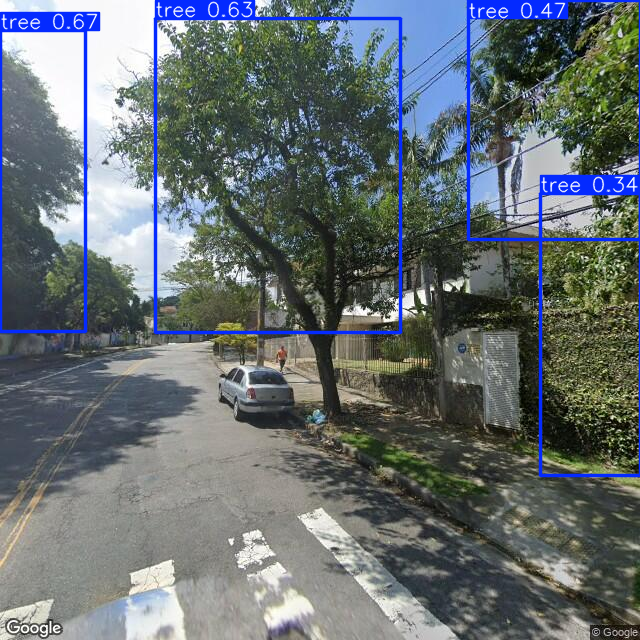

Saved 1 image to inference_results


Results:          xmin        ymin        xmax        ymax  confidence  class  name
0    0.000000   30.231308   85.089981  331.043213    0.670772      0  tree
1  155.635315   18.078934  400.017517  332.138306    0.632767      0  tree
2  468.441589    0.000000  640.000000  239.698029    0.471239      0  tree
3  540.545044  193.294693  640.000000  475.522888    0.338948      0  tree


In [ ]:
import torch
from PIL import Image
from pathlib import Path

model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/custom_yolo_project/yolov5/runs/train/exp9/weights/best.pt')

image_path = '/content/drive/MyDrive/custom_yolo_project/images/test.png'


results = model(image_path)


results.show()
results.save(save_dir=Path('./inference_results'))

print("Results:", results.pandas().xyxy[0])


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import torch
from PIL import Image
from pathlib import Path

model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/custom_yolo_project/yolov5/runs/train/exp9/weights/best.pt')

image_path = '//content/drive/MyDrive/custom_yolo_project/images/test1.jpg'

results = model(image_path)

results.show()
results.save(save_dir=Path('./content/drive/My Drive/inference_results'))

print("Results:", results.pandas().xyxy[0])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import torch
from pathlib import Path

# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/custom_yolo_project/yolov5/runs/train/exp9/weights/best.pt')

# Set the image path
image_path = '/content/drive/MyDrive/custom_yolo_project/images/test1.jpg'

# Perform inference
results = model(image_path)

# Get results as a pandas DataFrame
detections = results.pandas().xyxy[0]  # Extract bounding box data

# Calculate heights of bounding boxes
detections['height'] = detections['ymax'] - detections['ymin']

# Print the heights of all bounding boxes
print("Bounding Box Heights:")
print(detections[['name', 'height']])


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-12-6 Python-3.10.12 torch-2.5.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 161 layers, 8493160 parameters, 0 gradients, 17.0 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Bounding Box Heights:
       name      height
0  building  299.967896
1      tree  521.497925
2      tree  541.654114


In [ ]:
import torch
print(torch.cuda.is_available())  # Should return True
print(torch.cuda.current_device())  # Returns the GPU ID in use


True
0


In [ ]:
!python /content/drive/MyDrive/custom_yolo_project/yolov5/export.py --weights /content/drive/MyDrive/custom_yolo_project/yolov5/runs/train/exp9/weights/best.pt --img-size 640 --batch-size 1 --device 0 --dynamic --simplify --include onnx

export: data=drive/MyDrive/custom_yolo_project/yolov5/data/coco128.yaml, weights=['/content/drive/MyDrive/custom_yolo_project/yolov5/runs/train/exp9/weights/best.pt'], imgsz=[640], batch_size=1, device=0, half=False, inplace=False, keras=False, optimize=False, int8=False, per_tensor=False, dynamic=True, cache=, simplify=True, mlmodel=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['onnx']
YOLOv5 🚀 v7.0-388-g882c35fc Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 161 layers, 8493160 parameters, 0 gradients, 17.0 GFLOPs

PyTorch: starting from /content/drive/MyDrive/custom_yolo_project/yolov5/runs/train/exp9/weights/best.pt with output shape (1, 25200, 8) (16.6 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 253.2 MB/s eta 0:00:00

re

In [ ]:
!python /content/drive/MyDrive/custom_yolo_project/yolov5/val.py --weights /content/drive/MyDrive/custom_yolo_project/yolov5/runs/train/exp9/weights/best.onnx --data /content/drive/MyDrive/custom_yolo_project/dataset.yaml --img-size 640 --batch 1 --device 0 --task val

val: data=/content/drive/MyDrive/custom_yolo_project/dataset.yaml, weights=['/content/drive/MyDrive/custom_yolo_project/yolov5/runs/train/exp9/weights/best.onnx'], batch_size=1, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=drive/MyDrive/custom_yolo_project/yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-388-g882c35fc Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Loading /content/drive/MyDrive/custom_yolo_project/yolov5/runs/train/exp9/weights/best.onnx for ONNX Runtime inference...
2024-12-15 17:13:59.230645998 [E:onnxruntime:Default, provider_bridge_ort.cc:1862 TryGetProviderInfo_CUDA] /onnxruntime_src/onnxruntime/core/session/provider_bridge_ort.cc:1539 onnxruntime::Provider& onnxruntime::ProviderLibrary::Get() [ONNXRuntimeError] : 1 : FAIL : Failed to load library libonnx

In [ ]:
import torch
from PIL import Image
from pathlib import Path

model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/custom_yolo_project/yolov5/runs/train/exp9/weights/best.pt')

image_path = '/content/drive/MyDrive/custom_yolo_project/images/test2.png'

results = model(image_path)

results.show()
results.save(save_dir=Path('./content/drive/My Drive/inference_results'))

print("Results:", results.pandas().xyxy[0])

Output hidden; open in https://colab.research.google.com to view.

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-1-21 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 161 layers, 8493160 parameters, 0 gradients, 17.0 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


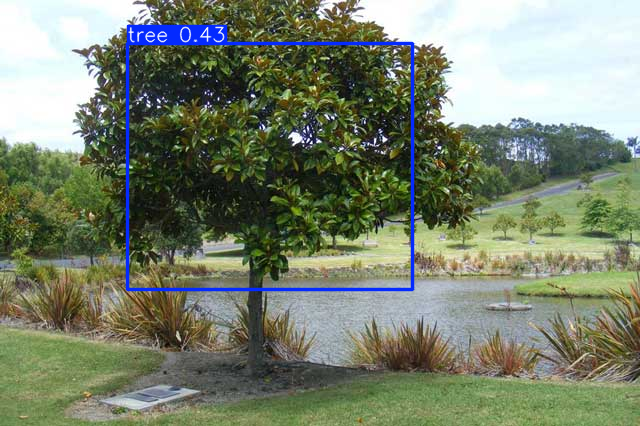

Saved 1 image to content/drive/My Drive/inference_results7


Results:         xmin       ymin        xmax       ymax  confidence  class  name
0  127.07576  43.887482  412.793884  289.05545    0.433078      0  tree


In [ ]:
import torch
from PIL import Image
from pathlib import Path

model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/custom_yolo_project/yolov5/runs/train/exp9/weights/best.pt')

image_path = '/content/drive/MyDrive/custom_yolo_project/images/test4.jpg'

results = model(image_path)

results.show()
results.save(save_dir=Path('./content/drive/My Drive/inference_results'))

print("Results:", results.pandas().xyxy[0])

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-1-21 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 161 layers, 8493160 parameters, 0 gradients, 17.0 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


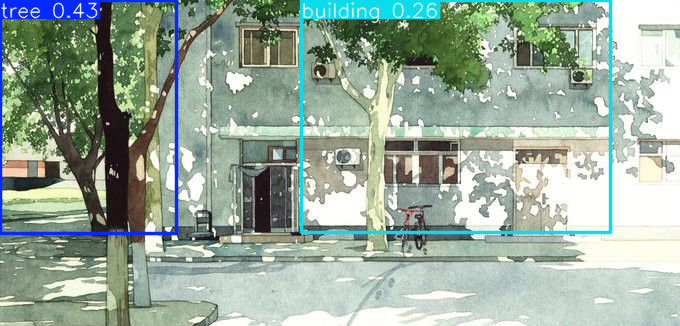

Saved 1 image to content/drive/My Drive/inference_results8


Results:          xmin  ymin        xmax        ymax  confidence  class      name
0    0.000000   0.0  176.672897  233.755859    0.430178      0      tree
1  301.430939   0.0  610.171631  232.361542    0.257215      1  building


In [ ]:
import torch
from PIL import Image
from pathlib import Path

model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/custom_yolo_project/yolov5/runs/train/exp9/weights/best.pt')

image_path = '/content/drive/MyDrive/custom_yolo_project/images/test5.jpg'

results = model(image_path)

results.show()
results.save(save_dir=Path('./content/drive/My Drive/inference_results'))

print("Results:", results.pandas().xyxy[0])

In [ ]:
!python /content/drive/MyDrive/custom_yolo_project/yolov5/train.py --data /content/drive/MyDrive/custom_yolo_project/dataset.yaml --cfg /content/drive/MyDrive/custom_yolo_project/yolov5/models/yolov5s.yaml --weights yolov5s.pt --epochs 20 --batch-size 16 --img-size 640

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-01-21 09:54:20.008261: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-21 09:54:20.030125: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-21 09:54:20.040791: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train:

In [ ]:
!python /content/drive/MyDrive/custom_yolo_project/yolov5/train.py --data /content/drive/MyDrive/custom_yolo_project/dataset.yaml --cfg /content/drive/MyDrive/custom_yolo_project/yolov5/models/yolov5s.yaml --weights yolov5s.pt --epochs 30 --batch-size 16 --img-size 640

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-01-21 10:03:13.494385: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-21 10:03:13.527629: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-21 10:03:13.537723: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train:

In [ ]:
!python /content/drive/MyDrive/custom_yolo_project/yolov5/train.py --data /content/drive/MyDrive/custom_yolo_project/dataset.yaml --cfg /content/drive/MyDrive/custom_yolo_project/yolov5/models/yolov5s.yaml --weights yolov5s.pt --epochs 40 --batch-size 16 --img-size 640

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-01-21 10:10:40.225439: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-21 10:10:40.245504: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-21 10:10:40.251550: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train:

In [ ]:
!python /content/drive/MyDrive/custom_yolo_project/yolov5/train.py --data /content/drive/MyDrive/custom_yolo_project/dataset.yaml --cfg /content/drive/MyDrive/custom_yolo_project/yolov5/models/yolov5s.yaml --weights yolov5s.pt --epochs 50 --batch-size 16 --img-size 640

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-01-21 10:21:36.346152: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-21 10:21:36.366311: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-21 10:21:36.372414: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train:

In [ ]:
!python /content/drive/MyDrive/custom_yolo_project/yolov5/train.py --data /content/drive/MyDrive/custom_yolo_project/dataset.yaml --cfg /content/drive/MyDrive/custom_yolo_project/yolov5/models/yolov5s.yaml --weights yolov5s.pt --epochs 60 --batch-size 16 --img-size 640

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-01-21 10:38:17.860523: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-21 10:38:17.880395: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-21 10:38:17.886531: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train:

In [ ]:
import torch
from PIL import Image
from pathlib import Path

model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/custom_yolo_project/yolov5/runs/train/exp14/weights/best.pt')

image_path = '/content/drive/MyDrive/custom_yolo_project/images/test6.jpg'

results = model(image_path)

results.show()
results.save(save_dir=Path('./content/drive/My Drive/inference_results'))

print("Results:", results.pandas().xyxy[0])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!python /content/drive/MyDrive/custom_yolo_project/yolov5/train.py --data /content/drive/MyDrive/custom_yolo_project/dataset.yaml --cfg /content/drive/MyDrive/custom_yolo_project/yolov5/models/yolov5s.yaml --weights yolov5s.pt --epochs 70 --batch-size 16 --img-size 640

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-01-21 10:58:54.186824: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-21 10:58:54.213014: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-21 10:58:54.219112: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train:

In [ ]:
!python /content/drive/MyDrive/custom_yolo_project/yolov5/train.py --data /content/drive/MyDrive/custom_yolo_project/dataset.yaml --cfg /content/drive/MyDrive/custom_yolo_project/yolov5/models/yolov5s.yaml --weights yolov5s.pt --epochs 80 --batch-size 16 --img-size 640

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-01-21 11:19:26.198349: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-21 11:19:26.232184: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-21 11:19:26.242705: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: